<a href="https://colab.research.google.com/github/datawilly/Analisis-de-series-de-tiempo/blob/main/Analisis_de_series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto de análisis de series de tiempo en precios de acciones

##Generando el Dataframe

Para este proyecto vamos a usar las librerias mas comunes dentro del analisis exploratorio de datos que va a ser nuestro punto de partida.

Las librerias a importar son:


*   numpy
*   pandas
*   matplotlib
*   seaborn



In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Una vez cargadas nuestras librerias tenemos que buscar los datos con los cuales vamos a trabajar, en este caso vamos a usar datos tomados de Yahoo Finance en formato csv

In [55]:
path = '/content/drive/MyDrive/Datasets/2023 Analisis de series de tiempo'
stock_data = pd.DataFrame()
company_list = ['AAPL.csv','AMZN.csv','GOOG.csv','META.csv','TSLA.csv']

Una vez cargada nuestra informacion vamos a generar un for loop que nos permita primero etiquetar la informacion correspondiente a cada empresa y despues que una toda la informacion en un solo dataframe

In [56]:
for file in company_list:
  temp_df = pd.read_csv(path+'/'+file)
  company_name = file[0:3]
  temp_df['company'] = file[0:4]
  stock_data = pd.concat([stock_data,temp_df])

Como podemos ver nuestro for loop funcionó de manera correcta ya que tenemos un solo dataframe con la informacion de nuestras 5 compañias y además etiquetada

In [57]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2018-01-10,43.290001,43.575001,43.250000,43.572498,41.433079,95839600,AAPL
1,2018-01-11,43.647499,43.872501,43.622501,43.820000,41.668427,74670800,AAPL
2,2018-01-12,44.044998,44.340000,43.912498,44.272499,42.098709,101672400,AAPL
3,2018-01-16,44.474998,44.847500,44.035000,44.047501,41.884750,118263600,AAPL
4,2018-01-17,44.037498,44.812500,43.767502,44.775002,42.576530,137547200,AAPL
...,...,...,...,...,...,...,...,...
1253,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,TSLA
1254,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,TSLA
1255,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,TSLA
1256,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220575900,TSLA


Es importante validar el tipo de datos que tiene cada columna de nuestro dataframe ya que si no tenemos el tipo correcto vamos a tener problemas en el manejo de los datos

In [58]:
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
company       object
dtype: object

Como pudimos verificar la columna 'Date' tiene un tipo de datos que no nos facilita su manejo por lo que siendo una fecha lo mas lógico que es que lo transformemos a un formato tipo fecha

In [69]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

Ahora si podemos usar la fecha como tal en nuestro analisis inicial sin tener inconvenientes a la hora de generar una serie de tiempo

In [60]:
stock_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
company              object
dtype: object

##Graficando nuestros datos

Una manera práctica para abordar los datos de manera inicial es a través de los gráficos, estos nos dan una idea general de la informacion que podemos obtener y nos pueden generar algunas preguntas que no se nos ocurririan con los gráficos en forma de tabla.

Primero generamos una lista con los nombres de cada compañia que nos va a servir como indice para nuestro gráfico

In [61]:
tech_list = stock_data['company'].unique()
tech_list 

array(['AAPL', 'AMZN', 'GOOG', 'META', 'TSLA'], dtype=object)

Procedemos a graficar cada una de las empresas con ayuda de matplotlib y un for loop que va a recorrer cada indice asignado al nombre de la compañia de acuerdo a la lista que creamos anteriormente la cual inicia con el número 1

Vamos a crear dos filas y tres columnas para graficar nuestras 5 compañias, no importa si nos queda un espacio en blanco al final, esto es porque estamos generando una cuadricula y solo podemos determinar un número para las filas y columnas

Generamos un nuevo dataframe que en resumen va a separar nuestro primer dataframe individualmente de acuerdo a la compañia y va a generar un gráfico de cada una, en esta ocasion escogimos los datos de la fecha para darle un orden cronologico y el precio de cierre de la accion de cada empresa

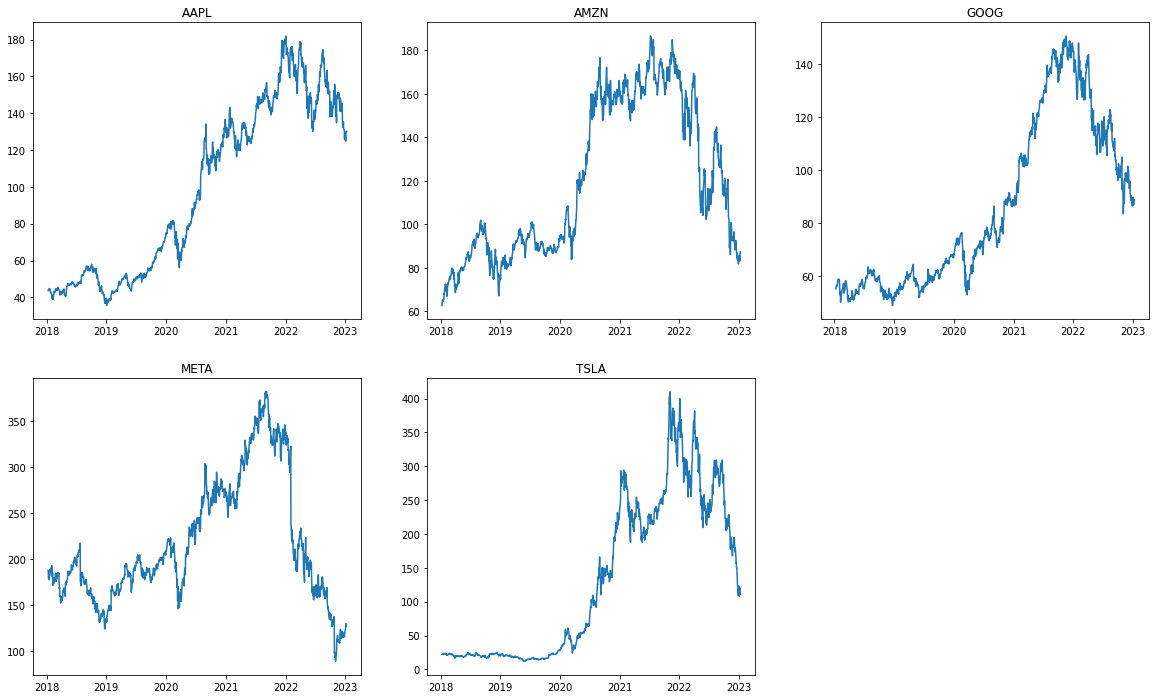

In [62]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
  plt.subplot(2,3,i)
  df = stock_data[stock_data['company']==company]
  plt.plot(df['Date'],df['Close'])
  plt.title(company)

In [63]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2018-01-10,22.146667,22.466667,22.000000,22.320000,22.320000,64648500,TSLA
1,2018-01-11,22.349333,22.987333,22.217333,22.530001,22.530001,99682500,TSLA
2,2018-01-12,22.575333,22.694000,22.244667,22.414667,22.414667,72376500,TSLA
3,2018-01-16,22.502666,23.000000,22.320000,22.670668,22.670668,97114500,TSLA
4,2018-01-17,22.698000,23.266666,22.650000,23.143999,23.143999,106552500,TSLA


In [64]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2018-01-10,43.290001,43.575001,43.250000,43.572498,41.433079,95839600,AAPL
1,2018-01-11,43.647499,43.872501,43.622501,43.820000,41.668427,74670800,AAPL
2,2018-01-12,44.044998,44.340000,43.912498,44.272499,42.098709,101672400,AAPL
3,2018-01-16,44.474998,44.847500,44.035000,44.047501,41.884750,118263600,AAPL
4,2018-01-17,44.037498,44.812500,43.767502,44.775002,42.576530,137547200,AAPL


A pesar de que el gráfico con matplotlib es entendible, existen librerias que nos permiten generar gráficos dinamicos los cuales podemos manipular de una manera mas interesante como es plotly

In [65]:
import plotly.express as px

Al igual que en matplotlib vamos a generar con un for loop pequeños dataframs por cada compañia los cuales se graficarán con ayuda de plotly

En este caso vamos a generar el gráfico con el precio mas bajo que tuvo la accion de cada empresa en el dia.

In [68]:
for company in tech_list:
  df = stock_data[stock_data['company']==company]
  fig=px.line(df,x='Date',y='Low',title=company)
  fig.show()